In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv('retail_store_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [3]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], format="%Y-%m-%d")
df.head(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


<Axes: >

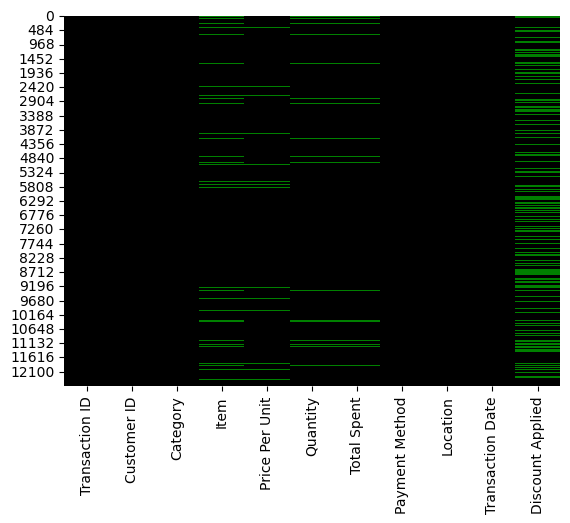

In [4]:
# визуализация отсутствующих значений
colours = ['black','green']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), cbar=False) 
# если отсутствуют одновременно Quantity и Total Spent, тогда есть Price Per Unit
# значит можно заполнить Quantity или Total Spent через kNN
# а потом найти недостающее

In [5]:
numeric_columns = ["Price Per Unit","Quantity","Total Spent"]
df[numeric_columns].describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


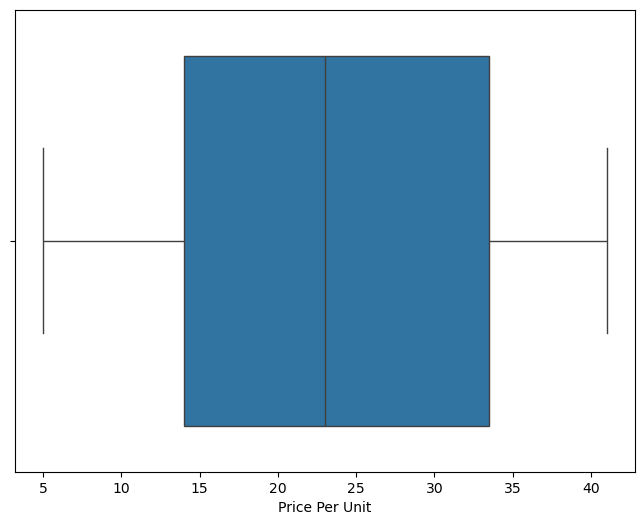

In [6]:
# ящик с усами (Price Per Unit)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price Per Unit'])
plt.show()

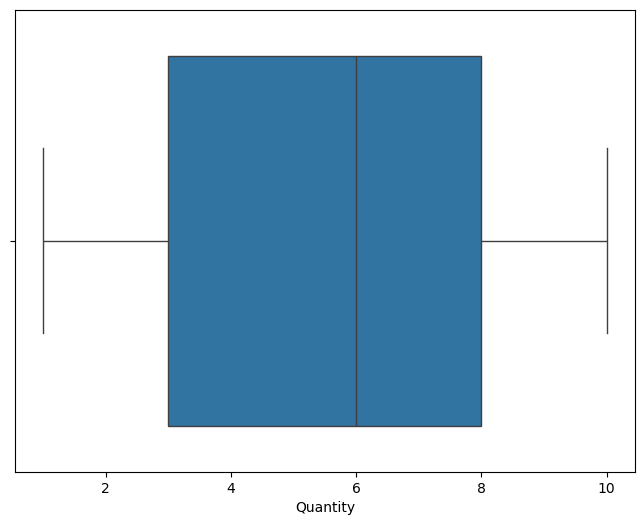

In [7]:
# ящик с усами (Quantity)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quantity'])
plt.show()

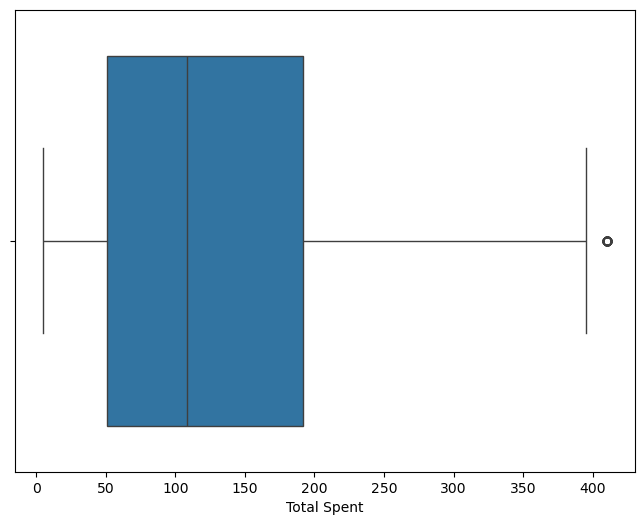

In [8]:
# ящик с усами (Total Spent)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Total Spent'])
plt.show()

<Axes: >

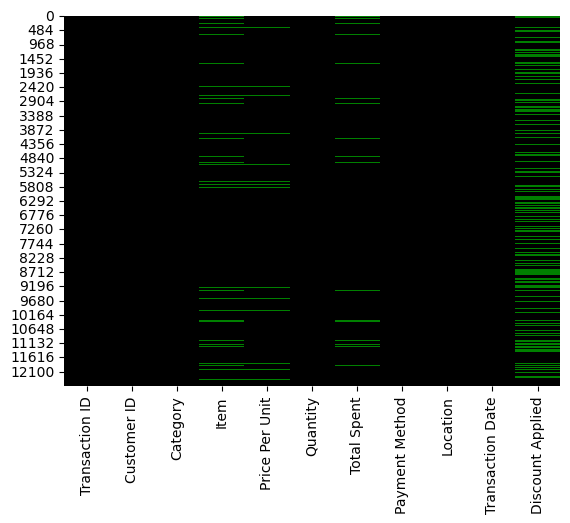

In [9]:
# заполнение пустот в Quantity с использованием метода K ближайших соседей (kNN)
num_col = df[['Quantity']]
imputer = KNNImputer(n_neighbors=2, weights='uniform')
num_col_imputed = pd.DataFrame(imputer.fit_transform(num_col), index=num_col.index, columns=num_col.columns)
num_col_imputed = np.floor(num_col_imputed)
df[num_col.columns] = num_col_imputed 
df.head(20)

sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), cbar=False) 

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,Unknown
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,20.0,10.0,200.0,Credit Card,Online,2023-11-30,Unknown
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,5.0,167.5,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


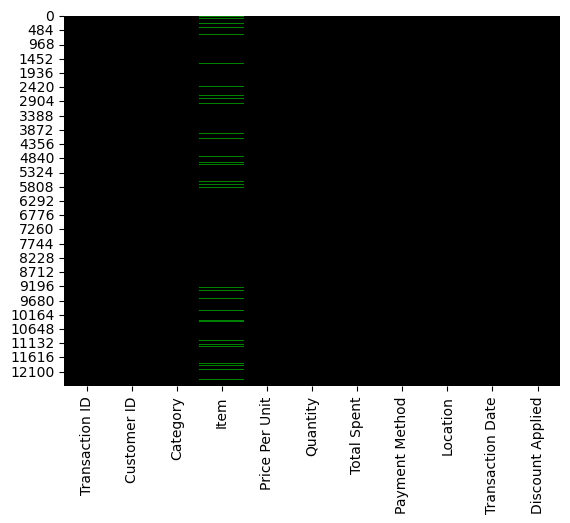

In [10]:
# нахождение Price Per Unit и Total Spent, + заполнение пустот Discount Applied
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Total Spent'] / df['Quantity'])
df['Total Spent'] = df['Total Spent'].fillna(df['Price Per Unit'] * df['Quantity'])
df['Discount Applied'] = df['Discount Applied'].fillna('Unknown')
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), cbar=False) 
df.head(20)

<Axes: >

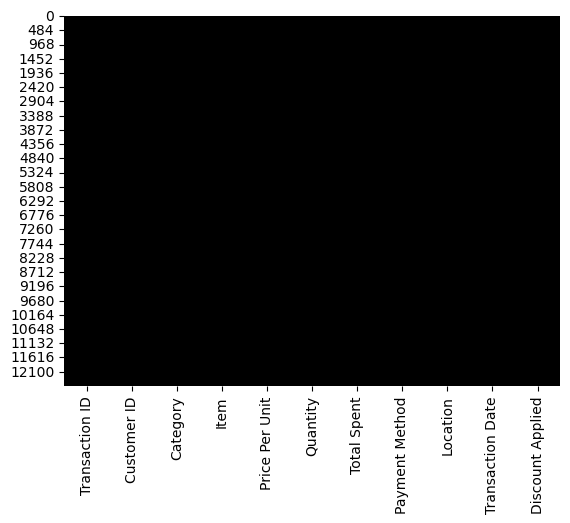

In [11]:
# заполнение пустот Item
all_categories = sorted(df['Category'].unique())
# all_items = df['Item'].unique() 
all_items_red = ['BEV', 'BUT','CEA', 'EHE', 'FOOD', 'FUR', 'MILK', 'PAT']
dict_pairs = dict(zip(all_categories, all_items_red))
df['Item'] = df['Item'].fillna("Item_0_" + df['Category'].map(dict_pairs))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours), cbar=False) 


In [12]:
df.to_csv('new_retail_store_sales.csv', index=False)

In [13]:
# ЕЩЕ ВАРИАНТ ЗАПОЛНЕНИЯ
# если пропуски превышают g
# df_del = df.copy()
# g = 3
# df_del = df[df.isnull().sum(axis=1) > g]
# df_del.head(10)
#sns.heatmap(df_del.isnull(), cmap=sns.color_palette(colours), cbar=False) 
# df1 = df.copy()
# df1 = df1[df1.isnull().sum(axis=1) < g]
# df1.shape
#sns.heatmap(df1.isnull(), cmap=sns.color_palette(colours), cbar=False)
# df.head(10)